In [15]:
# Importing dependencies
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

pd.set_option("display.precision",2)
pd.set_option("display.max_columns",None)

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC 
from sklearn.model_selection import validation_curve, learning_curve

import pickle

In [2]:
# loading the dataset
df = pd.read_pickle('./pickled/Train_set_scaled')

In [3]:
df['Target'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3'] + \
    df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [4]:
df['Target'].replace(
    df[df['Target']>0]['Target'].values.tolist(),
    1,
    inplace = True
)

In [5]:
X = df.drop(columns=['index', 'ID', 'AcceptedCmp1', 'AcceptedCmp2',
                     'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Target'])
y = df['Target']

In [6]:
X_train, X_test, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [7]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [8]:
# Lets start with linear kernel
svc = SVC(random_state=42,kernel='linear')

In [9]:
cross_val_score(svc,X,y,cv=skf,scoring='roc_auc').mean()

0.7816451959816335

In [10]:
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [11]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
svc_pred = svc.predict(X_test)

### Model Evaluation

In [13]:
print(f"ROC-AUC Score: {roc_auc_score(y_valid,svc_pred)}")
print(classification_report(y_valid, y_pred=svc_pred))

ROC-AUC Score: 0.6658014786849142
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       326
           1       0.60      0.44      0.50       117

    accuracy                           0.77       443
   macro avg       0.71      0.67      0.68       443
weighted avg       0.76      0.77      0.76       443



Plotting Confusion Matrix

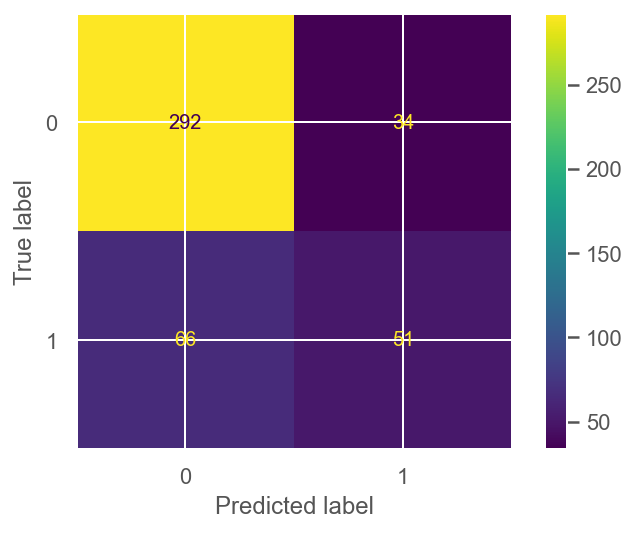

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid,svc_pred,labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()